In [1]:
%pylab inline
import SimpleITK as sitk
import numpy as np
from copy import deepcopy

#Si crea una deepcopy per evitare che il riferimento punti allo stesso oggetto copiato

Populating the interactive namespace from numpy and matplotlib


In [2]:
torace_sitk=sitk.ReadImage("chest.nrrd")
torace=sitk.GetArrayFromImage(torace_sitk)

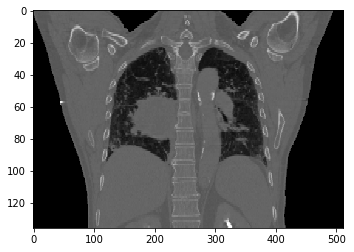

In [15]:
pixel_ratio=torace_sitk.GetSpacing()[2]/torace_sitk.GetSpacing()[0]
imshow(torace[::-1,256,:], aspect=pixel_ratio, cmap=cm.gray)

In [7]:
torace2 = deepcopy(torace)
torace2[torace<200]=0

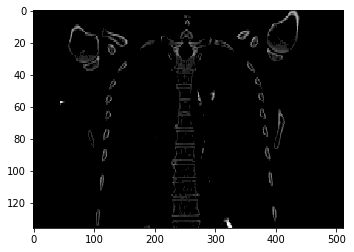

In [8]:
imshow(torace2[::-1,256,:], aspect=pixel_ratio, cmap=cm.gray)

In [9]:
from skimage import filters
from skimage import feature

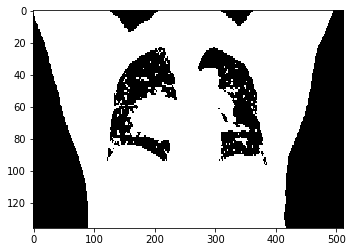

In [10]:
torace_otsu_threshold = filters.threshold_otsu(torace[::-1,256,:])
torace_otsu = torace[::-1,256,:] >= torace_otsu_threshold
#Con il comando precedente dico tutto quello che nel torace è compreso in una certa soglia
#deve essere maggiore di una certa sogia definita sopra alla seconda riga
imshow(torace_otsu, aspect=pixel_ratio, cmap=cm.gray)

In [11]:
print(torace_otsu_threshold)
#Per visualizzare la soglia del threshold

-512


/usr/local/lib/python2.7/dist-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/usr/local/lib/python2.7/dist-packages/skimage/filters/thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


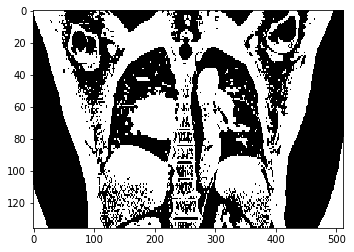

In [12]:
torace_adaptative = filters.threshold_adaptive(torace[::-1,256,:].astype(float), 71)
imshow(torace_adaptative, aspect=pixel_ratio, cmap=cm.gray)
#l'errore che viene fuori indica semplicemente che dalla versione 0.15 la funzione utilizzata 
# cambierà nome. L'informazione ottenuta è sul gradiente locale.

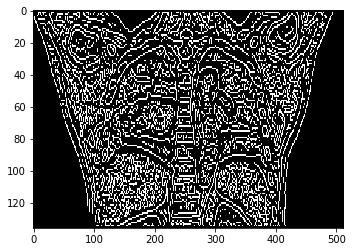

In [9]:
torace_canny = feature.canny(torace[::-1,256,:].astype(float))
imshow(torace_canny, aspect=pixel_ratio, cmap=cm.gray)

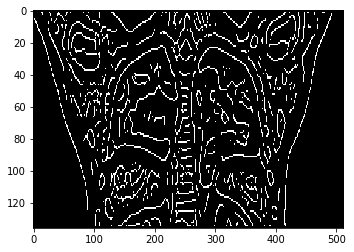

In [10]:
torace_canny = feature.canny(torace[::-1,256,:].astype(float), sigma=3)
imshow(torace_canny, aspect=pixel_ratio, cmap=cm.gray)
# più aumento sigma più vengono persi dettagli

In [11]:
from sklearn import mixture

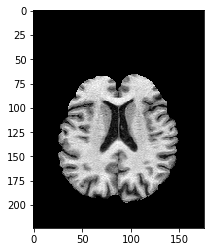

In [14]:
brain_sitk=sitk.ReadImage("Tizio_T1.nii.gz")
brain=sitk.GetArrayFromImage(brain_sitk)

assiale_brain=brain[160,::-1,:]
imshow(assiale_brain, cmap=cm.gray)

(array([2.6727e+04, 1.2000e+01, 2.1000e+01, 3.1000e+01, 4.4000e+01,
        4.9000e+01, 6.4000e+01, 8.2000e+01, 8.3000e+01, 1.0000e+02,
        9.0000e+01, 7.8000e+01, 6.6000e+01, 7.7000e+01, 7.3000e+01,
        7.1000e+01, 7.6000e+01, 5.5000e+01, 6.2000e+01, 6.4000e+01,
        6.1000e+01, 7.0000e+01, 3.8000e+01, 5.8000e+01, 4.6000e+01,
        5.3000e+01, 6.0000e+01, 9.1000e+01, 5.5000e+01, 5.0000e+01,
        5.6000e+01, 6.6000e+01, 5.9000e+01, 6.7000e+01, 6.0000e+01,
        5.6000e+01, 7.9000e+01, 6.3000e+01, 7.7000e+01, 8.2000e+01,
        8.5000e+01, 9.5000e+01, 9.9000e+01, 1.0600e+02, 1.0700e+02,
        1.5600e+02, 1.4800e+02, 1.7000e+02, 1.5700e+02, 1.5200e+02,
        1.6400e+02, 1.6100e+02, 1.7000e+02, 1.7800e+02, 2.6700e+02,
        1.9700e+02, 1.8900e+02, 1.8700e+02, 1.5800e+02, 1.7300e+02,
        1.5000e+02, 1.4400e+02, 1.6400e+02, 1.8700e+02, 1.0500e+02,
        1.1500e+02, 1.3900e+02, 1.3300e+02, 1.3800e+02, 1.3200e+02,
        1.4500e+02, 1.6600e+02, 2.3300e+02, 2.29

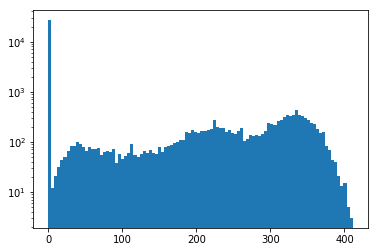

In [18]:
hist(assiale_brain.flatten(), bins=100, log=True)

In [23]:
g = mixture.GaussianMixture(n_components=4, n_init=5)
g.fit(assiale_brain.flatten().reshape(-1,1))
Y=g.predict(assiale_brain.flatten().reshape(-1, 1))

In [29]:
g.means_

array([[  0.        ],
       [330.48002316],
       [223.3970953 ],
       [ 86.93456002]])

In [25]:
labels=Y.reshape(assiale_brain.shape)

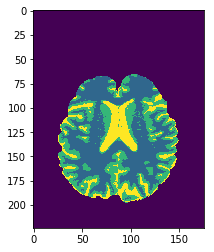

In [26]:
imshow(labels)

In [31]:
Y.shape

(39424,)

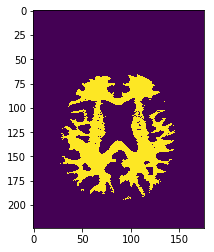

In [32]:
bianca = np.zeros_like(labels)
bianca[labels==1]=1
imshow(bianca)

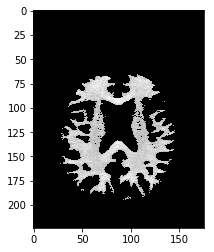

In [33]:
imshow(assiale_brain*bianca, cmap="gray")